<a href="https://colab.research.google.com/github/hasanasyarie/PSDS_KelasMahir/blob/main/HASAN_ASY_ARIE_%5BKM0101%5DEDA_dan_Data_Preprocessing_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?id=1-CkViCEe_aRWGzvLqCu15w3VMXbDQfsF
)


# Pendahuluan

### Import Library

In [7]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Mengakses dataset

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/hasanasyarie/PSDS_KelasMahir/main/titanic_modify.csv')
df.head() 

,Unnamed: 0,Unnamed: 0.1,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Tujuan analisis data 
Melakukan klasifikasi penumpang yang selamat dan tidak selamat pada kasus tenggelamnya kapal Titanic.

### Memahami dataset

Dataset Titanic dibuat untuk membuat machine learning untuk melakukan klasifikasi biner(Selamat atau Tidak Selamat. Variabel-variabel yang terdapat pada dataset ini adalah sebagai berikut:
1. **PassengerId** = Nomor Id Penumpang 
2. **Survived** = Keterangan Selamat(0=Tidak, 1=Ya)
3. **Pclass** = Kelas Tiket (1=Kelas 1, 2=Kelas 2, dst)
4. **Name** = Nama Penumpang
5. **Sex** = Jenis kelamin
6. **Age** = Usia dalam tahun
7. **SibSp** = Jumlah saudara kandung / pasangan di kapal Titanic
8. **Parch** = Jumlah orang tua / anak di kapal Titanic
9. **Ticket** = Nomor Tiket
10. **Fare** = Harga Tiket
11. **Cabin** = Nama Kabin
12. **Embarked** = Pelabuhan Asal (C = Cherbourg, Q = Queenstown, S = Southampton)

#**Eksploratory Data Analysis**

### Dimensi Data

In [41]:
df.shape

(707, 14)

Artinya kita memiliki data dengan 14 kolom dan 707 baris

### Variabel Pada Dataset

In [42]:
df.columns.values 

array(['Unnamed: 0', 'Unnamed: 0.1', 'PassengerId', 'Survived', 'Pclass',
       'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'], dtype=object)

In [43]:
df.dtypes

Unnamed: 0        int64
Unnamed: 0.1      int64
PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

In [44]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    707 non-null    int64  
 1   Unnamed: 0.1  707 non-null    int64  
 2   PassengerId   707 non-null    int64  
 3   Survived      707 non-null    int64  
 4   Pclass        707 non-null    int64  
 5   Name          707 non-null    object 
 6   Sex           707 non-null    object 
 7   Age           562 non-null    float64
 8   SibSp         707 non-null    int64  
 9   Parch         707 non-null    int64  
 10  Ticket        707 non-null    object 
 11  Fare          707 non-null    float64
 12  Cabin         159 non-null    object 
 13  Embarked      706 non-null    object 
dtypes: float64(2), int64(7), object(5)
memory usage: 77.5+ KB


Kita dapat mengetahui tipe-tipe data masing-masing variabel dan nama-nama variabel dalam dataset

### Mengecek Missing Data

In [45]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             145
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           548
Embarked          1
dtype: int64

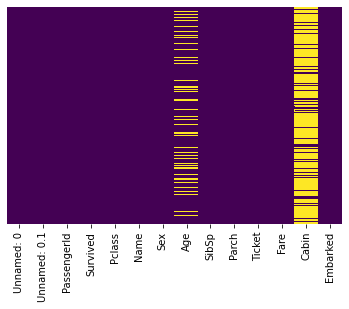

In [46]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Kolom-kolom dengan data kosong adalah: Age, Cabin, Embarked

### Mengecek Outlier

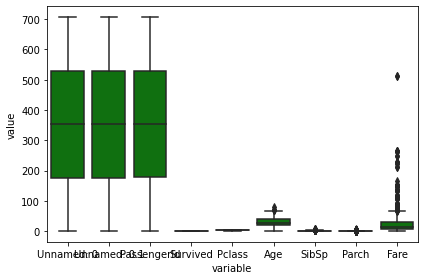

In [47]:
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()


Kolom numeric yang memiliki outlier adalah Age, Sibsp, Parch, dan Fare

### Melihat Korelasi Data

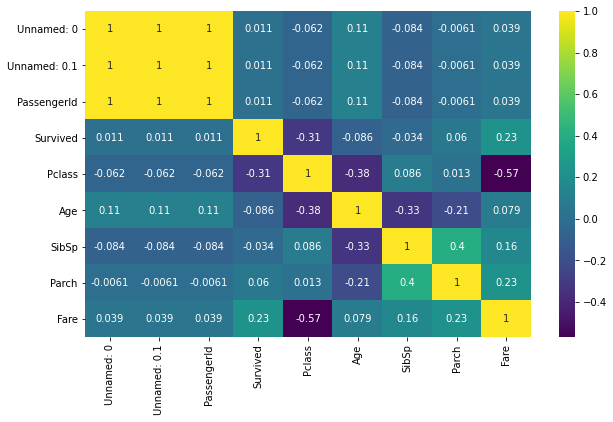

In [48]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

### Melihat Statistik Data

In [49]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,707.000000,707.000000,707.000000,707.000000,707.000000,562.000000,707.000000,707.000000,707.000000
mean,353.000000,353.000000,354.000000,0.387553,2.308345,30.034253,0.530410,0.383310,32.358775
std,204.237607,204.237607,204.237607,0.487537,0.835458,14.626759,1.067214,0.815157,48.629001
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,176.500000,176.500000,177.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,353.000000,353.000000,354.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,529.500000,529.500000,530.500000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,706.000000,706.000000,707.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

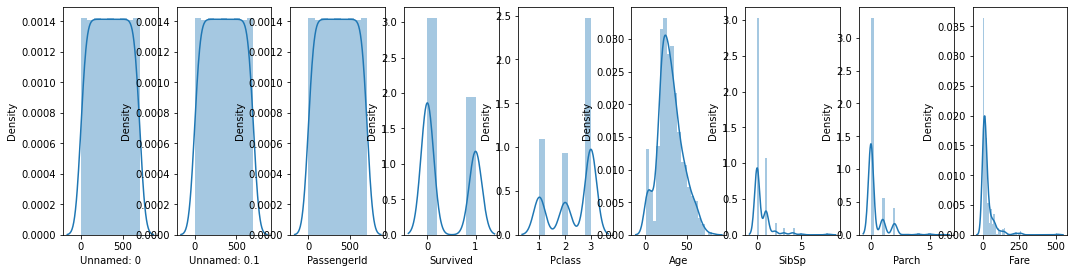

In [50]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

Plot ini untuk melihat apakah variabel-variabel pada dataset berdistribusi normal. Variabel-variabel Age, SibSp, Parch, dan Fare cenderung memiliki skewnes positif. Itu berarti berarti ekor distribusi berada di sebelah kanan nilai terbanyak.

Apa itu Skewnes dan Kurtosis?
https://thomassoseco.blogspot.com/2019/02/skewness-dan-kurtosis.html

### Pairplot

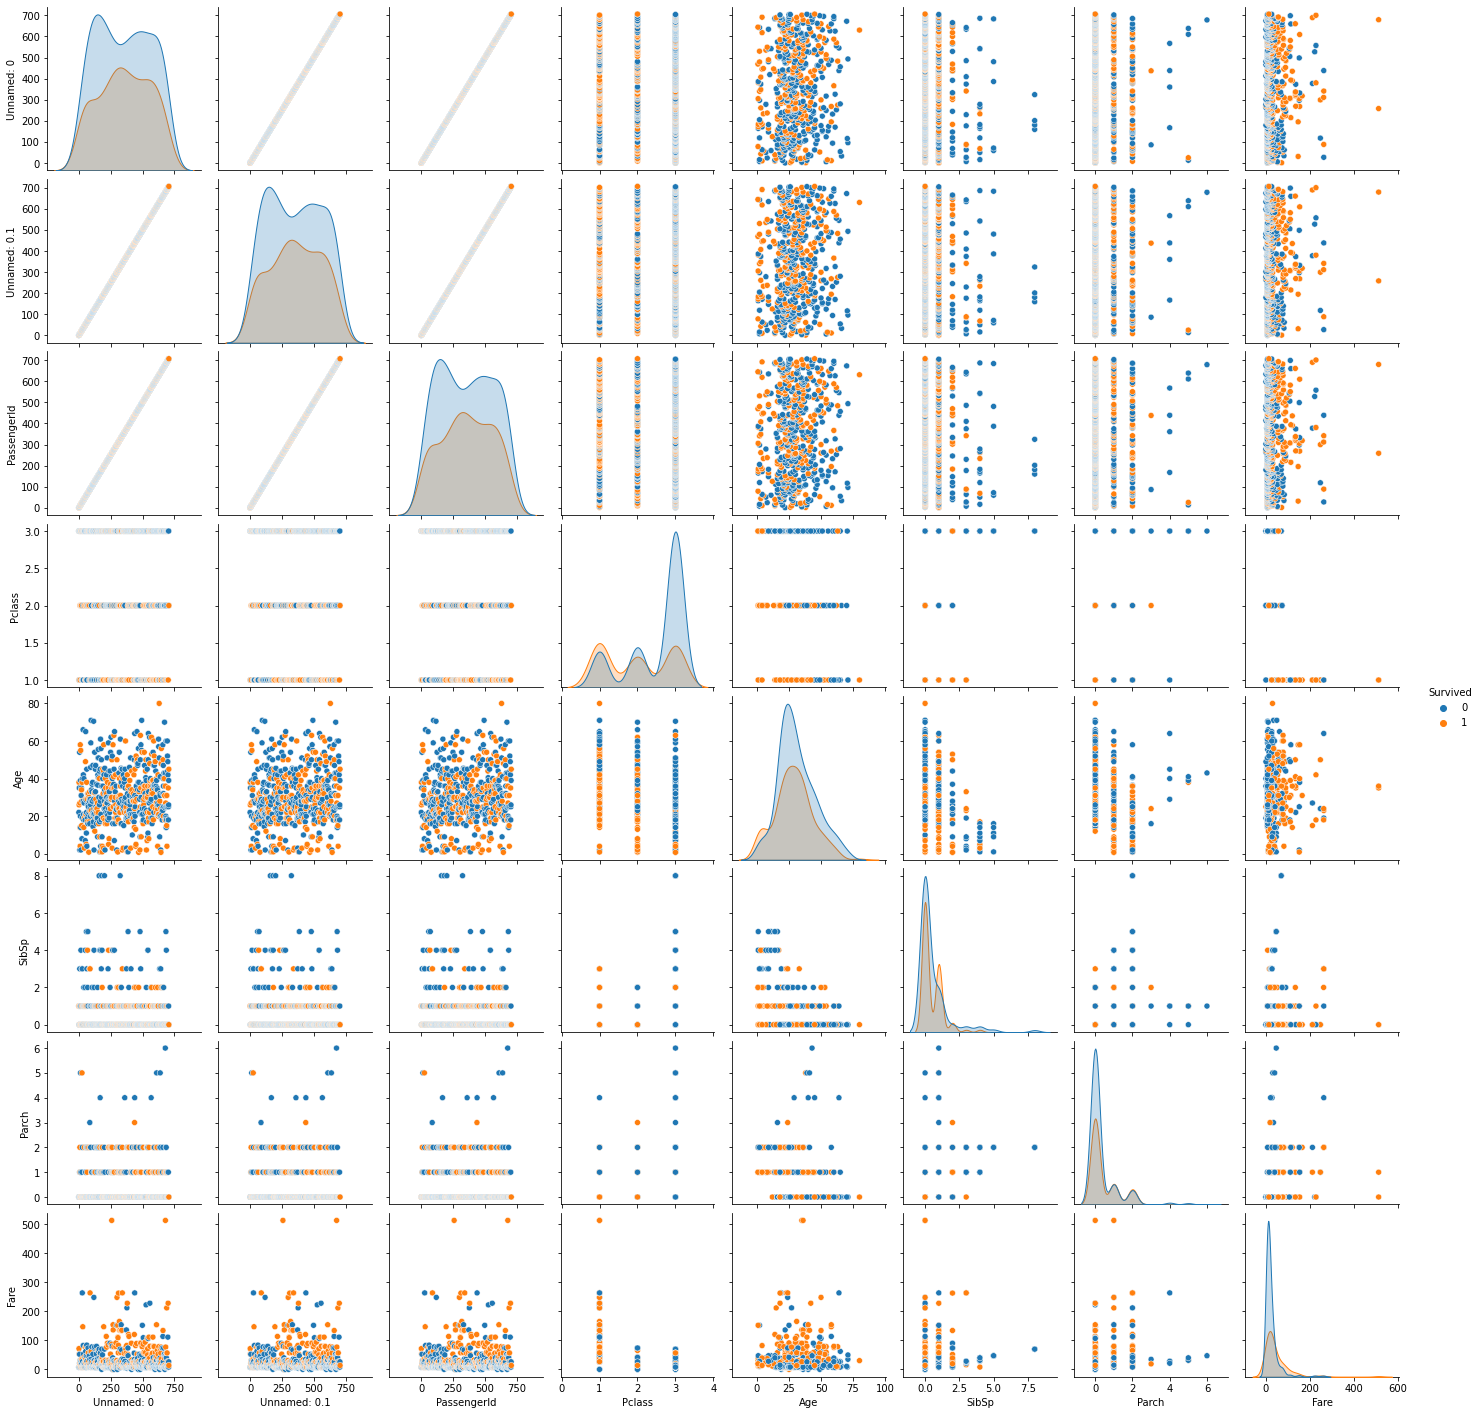

In [51]:
g = sns.pairplot(df1, hue="Survived")

Plot ini untuk mengetahui plot untuk masing-masing pasangan data numerik

#**Data Preprocessing**

Data preprocessing ini digunakan guna menyiapkan data untuk diklasifikasi menggunakan metode SVM(Hanya Contoh).

Setelah mengetahui hasil EDA di atas maka untuk hasil yang baik diperlukan beberapa hal sebagai berikut:
1. Menghapus kolom teks yang tidak diperlukan: **Name** dan **Ticket**
2. Mengisi NaN pada kolom **Cabin** dengan salah satu nama kabin tertentu*, mengisi NaN pada kolom **Age **dengan nilai rata-ratanya
3. Melakukan pengkodean(Encoding) pada kolom **Sex** , **Cabin**, dan **Embarked**
4. Menghapus outlier
5. Karena nilai data ada yang sangat besar dan kecil maka perlu dilakukan normalisasi

Setelah data diperbaiki dilakukan langkah sebagai berikut:
1. Memilih variabel independent dan label
2. Membagi data menjadi data training dan data testing


[Note] * Ini hanya contoh untuk melakukan pengisian data NaN(Kosong), nama kabin mungkin menjadi penting sehingga tidak segampang itu diganti

### Seleksi Kolom

In [52]:
df=df.drop(columns=['Name', 'Ticket'])
df.head()

,Unnamed: 0,Unnamed: 0.1,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,2,2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,3,3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,4,4,5,0,3,male,35.0,0,0,8.0500,NaN,S


### Mengisis NaN

In [53]:
df['Cabin'].value_counts()

G6             4
C23 C25 C27    4
C22 C26        3
F33            3
D              3
              ..
B37            1
C128           1
B94            1
A32            1
C101           1
Name: Cabin, Length: 121, dtype: int64

In [54]:
df['Cabin'] = df['Cabin'].replace(np.nan, "E49")
df.head()

,Unnamed: 0,Unnamed: 0.1,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0,1,0,3,male,22.0,1,0,7.2500,E49,S
1,1,1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,2,2,3,1,3,female,26.0,0,0,7.9250,E49,S
3,3,3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,4,4,5,0,3,male,35.0,0,0,8.0500,E49,S


In [55]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df.head()

,Unnamed: 0,Unnamed: 0.1,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0,1,0,3,male,22.0,1,0,7.2500,E49,S
1,1,1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,2,2,3,1,3,female,26.0,0,0,7.9250,E49,S
3,3,3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,4,4,5,0,3,male,35.0,0,0,8.0500,E49,S


In [56]:
df[['Age','Cabin']].isnull().sum()

Age      0
Cabin    0
dtype: int64

### Melakukan Pengkodean(Encoding)

In [57]:
df['Sex'].value_counts()

male      453
female    254
Name: Sex, dtype: int64

In [58]:
df['Embarked'].value_counts()

S    506
C    136
Q     64
Name: Embarked, dtype: int64

In [59]:
df['Cabin'].value_counts()

E49            548
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
C128             1
B94              1
A32              1
E34              1
C101             1
Name: Cabin, Length: 122, dtype: int64

In [60]:
#Encoding dengan data sedikit
cleanup_nums = {"Sex":     {"male": 1, "female": 2},
                "Embarked": {"S": 1, "C": 2, "Q": 3}}
df = df.replace(cleanup_nums)
df.head()

,Unnamed: 0,Unnamed: 0.1,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0,1,0,3,1,22.0,1,0,7.2500,E49,1.0
1,1,1,2,1,1,2,38.0,1,0,71.2833,C85,2.0
2,2,2,3,1,3,2,26.0,0,0,7.9250,E49,1.0
3,3,3,4,1,1,2,35.0,1,0,53.1000,C123,1.0
4,4,4,5,0,3,1,35.0,0,0,8.0500,E49,1.0


In [61]:
df["Cabin"] = df["Cabin"].astype('category')
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
PassengerId        int64
Survived           int64
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Cabin           category
Embarked         float64
dtype: object

In [62]:
#Encoding data dengan kategori sangat banyak
df["Cabin"] = df["Cabin"].cat.codes
df.head()

,Unnamed: 0,Unnamed: 0.1,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0,1,0,3,1,22.0,1,0,7.2500,108,1.0
1,1,1,2,1,1,2,38.0,1,0,71.2833,68,2.0
2,2,2,3,1,3,2,26.0,0,0,7.9250,108,1.0
3,3,3,4,1,1,2,35.0,1,0,53.1000,47,1.0
4,4,4,5,0,3,1,35.0,0,0,8.0500,108,1.0


Referensi Encoding Lengkap:
https://pbpython.com/categorical-encoding.html

### Menghapus Outlier

Rentang interkuartil (IQR) adalah ukuran penyebaran statistik dan dihitung sebagai perbedaan antara persentil ke-75 dan ke-25. Ini diwakili oleh rumus IQR = Q3 - Q1. Baris kode di bawah menghitung dan mencetak kisaran interkuartil untuk setiap variabel dalam dataset.

Teknik ini menggunakan skor IQR yang dihitung sebelumnya untuk menghilangkan pencilan. Aturan praktisnya adalah bahwa segala sesuatu yang tidak berada dalam kisaran (Q1 - 1.5 IQR) dan (Q3 + 1.5 IQR) adalah pencilan, dan dapat dihapus.

Metode ini dipakai karena untuk identifikasi outlier awal digunakan metode boxplot.

Referensi: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

In [63]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Unnamed: 0      353.00
Unnamed: 0.1    353.00
PassengerId     353.00
Survived          1.00
Pclass            1.00
Sex               1.00
Age              14.00
SibSp             1.00
Parch             0.00
Fare             23.35
Cabin             0.00
Embarked          1.00
dtype: float64


In [64]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,Unnamed: 0,Unnamed: 0.1,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0,1,0,3,1,22.000000,1,0,7.2500,108,1.0
2,2,2,3,1,3,2,26.000000,0,0,7.9250,108,1.0
4,4,4,5,0,3,1,35.000000,0,0,8.0500,108,1.0
5,5,5,6,0,3,1,30.034253,0,0,8.4583,108,3.0
9,9,9,10,1,2,2,14.000000,1,0,30.0708,108,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
697,697,697,698,1,3,2,30.034253,0,0,7.7333,108,3.0
703,703,703,704,0,3,1,25.000000,0,0,7.7417,108,3.0
704,704,704,705,0,3,1,26.000000,1,0,7.8542,108,1.0
705,705,705,706,0,2,1,39.000000,0,0,26.0000,108,1.0


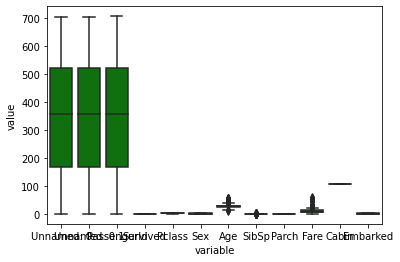

In [65]:
#Melihat Outlier
sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df_clear))

plt.show()

Outlier berhasil dihapus

### Normalisasi Data

Karena tujuannya adalah klasifikasi menggunakan SVM maka normalisasi data wajib dilakukan.

Lihat referensi: 
https://neerajkumar.org/writings/svm/#:~:text=SVMs%20assume%20that%20the%20data,the%20SVM%20is%20very%20important.&text=Some%20libraries%20recommend%20doing%20a,dimension%20to%200%20and%201.



In [66]:
#Normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)

df_norm

,Unnamed: 0,Unnamed: 0.1,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.222222,0.5,0.0,0.122054,0.0,0.0
1,0.002833,0.002833,0.002833,1.0,1.0,1.0,0.311111,0.0,0.0,0.133418,0.0,0.0
2,0.005666,0.005666,0.005666,0.0,1.0,0.0,0.511111,0.0,0.0,0.135522,0.0,0.0
3,0.007082,0.007082,0.007082,0.0,1.0,0.0,0.400761,0.0,0.0,0.142396,0.0,1.0
4,0.012748,0.012748,0.012748,1.0,0.5,1.0,0.044444,0.5,0.0,0.506242,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.987252,0.987252,0.987252,1.0,1.0,1.0,0.400761,0.0,0.0,0.130190,0.0,1.0
396,0.995751,0.995751,0.995751,0.0,1.0,0.0,0.288889,0.0,0.0,0.130332,0.0,1.0
397,0.997167,0.997167,0.997167,0.0,1.0,0.0,0.311111,0.5,0.0,0.132226,0.0,0.0
398,0.998584,0.998584,0.998584,0.0,0.5,0.0,0.600000,0.0,0.0,0.437710,0.0,0.0


### Memilih Variable Target & Variabel Independent

In [67]:
y=df_norm['Survived']
X=df_norm.drop(columns=['Survived'])

#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

print(y)
print(X)

[0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.

### Membagi Data Menjadi Data Training dan Data Testing

In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y)

## **This is the end of Notebooks**


`Say: Alhamdulillah, panjang banget dah :)`


#**Referensi:**
https://nbviewer.jupyter.org/github/PBPatil/Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb